## 1. Load data

In [1]:
import numpy as np

# Load npz
data = np.load("../data/cancer_data.npz")

X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

print(f"Training X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Testing X shape: {X_test.shape}, y shape: {y_test.shape}")

Training X shape: (64, 4), y shape: (64,)
Testing X shape: (136, 4), y shape: (136,)


## 2. Load Trainable Quantum Feature Map

In [2]:
#!/usr/bin/env python3
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))

In [3]:
import pickle

with open(f"../data/tqfm_depth1.pkl", "rb") as f:
	tqfm = pickle.load(f)


## 3. Load Kernel

In [4]:
kernel = np.load("../data/kernel_matrix_after.npy")

## 3. Quantum Support Vector Machine

In [5]:
# update last change
import importlib
import src.qsvm
importlib.reload(src.qsvm)

<module 'src.qsvm' from 'd:\\QuantumComputing\\SVQSVM\\src\\qsvm.py'>

In [54]:
from src.qsvm import QSVC

qsvc = QSVC(C=10.0, gamma=1.0, depth=2, type_ansatz="EfficientSU2", optimizer='COBYLA', max_iter=500)
qsvc.fit(X=X_train,
	y=y_train,
	kernel_matrix=kernel,
	theta_optimal=tqfm.optimal_params,
	parametrized_circuit=tqfm.circuit,
	)

accuracy = qsvc.score(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


Using random initialization with 36 parameters
Test accuracy: 84.56%


In [55]:
qsvc.optimal_value

np.float64(-4.004686525469614)

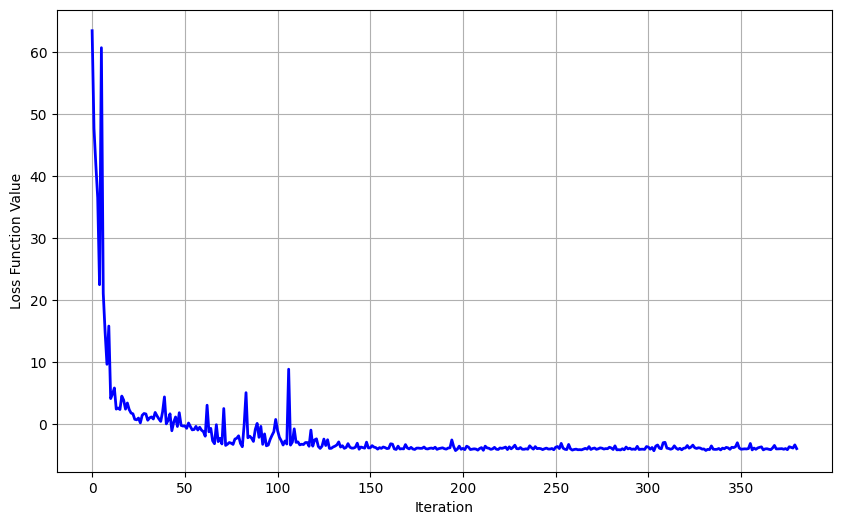

In [56]:
qsvc.plot_convergence()

In [ ]:
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP, SPSA



In [35]:
from src.qsvm import QSVC

qsvc1 = QSVC(C=10.4, gamma=1.0, type_ansatz="EfficientSU2", optimizer='L-BFGS-B', max_iter=500)
qsvc1.fit(X=X_train,
	y=y_train,
	kernel_matrix=kernel,
	theta_optimal=tqfm.optimal_params,
	parametrized_circuit=tqfm.circuit)

accuracy = qsvc1.score(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


Using random initialization with 24 parameters
Test accuracy: 94.12%


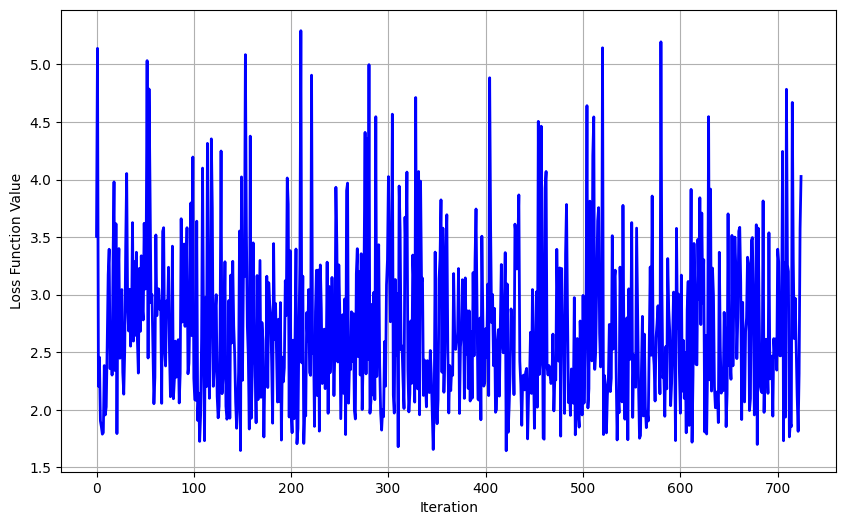

In [36]:
qsvc1.plot_convergence()

## 4. Test accuracy with classical SVM

In [29]:
from src.kernel_estimate import KernelMatrix

kernel_test = np.load("../data/kernel_matrix_test.npy")

In [40]:
# classical SVM with tqfm kernel
from sklearn.svm import SVC
for c in np.arange(1, 100, 0.5):
	svc = SVC(kernel='precomputed', C=c)
	svc.fit(kernel, y_train)
	accuracy_svc = svc.score(kernel_test, y_test)
	print(f"Classical SVC Test accuracy with tqfm kernel and C={c}: {accuracy_svc * 100:.2f}%")

Classical SVC Test accuracy with tqfm kernel and C=1.0: 94.12%
Classical SVC Test accuracy with tqfm kernel and C=1.5: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=2.0: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=2.5: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=3.0: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=3.5: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=4.0: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=4.5: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=5.0: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=5.5: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=6.0: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=6.5: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=7.0: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=7.5: 94.85%
Classical SVC Test accuracy with tqfm kernel and C=8.0: 95.59%
Classical SVC Test accuracy with tqfm kernel and C=8.5:

In [39]:
from sklearn.svm import SVC

for c in np.arange(1, 100, 0.5):
		# Classical SVC with Polynomial kernel
		svc = SVC(kernel='poly', C=c)
		svc.fit(X_train, y_train)
		accuracy_svc = svc.score(X_test, y_test)
		print(f"Classical SVC Test accuracy with C={c}: {accuracy_svc * 100:.2f}%")


Classical SVC Test accuracy with C=1.0: 96.32%
Classical SVC Test accuracy with C=1.5: 95.59%
Classical SVC Test accuracy with C=2.0: 94.85%
Classical SVC Test accuracy with C=2.5: 94.85%
Classical SVC Test accuracy with C=3.0: 95.59%
Classical SVC Test accuracy with C=3.5: 95.59%
Classical SVC Test accuracy with C=4.0: 96.32%
Classical SVC Test accuracy with C=4.5: 97.06%
Classical SVC Test accuracy with C=5.0: 97.06%
Classical SVC Test accuracy with C=5.5: 97.79%
Classical SVC Test accuracy with C=6.0: 97.79%
Classical SVC Test accuracy with C=6.5: 97.79%
Classical SVC Test accuracy with C=7.0: 97.79%
Classical SVC Test accuracy with C=7.5: 97.79%
Classical SVC Test accuracy with C=8.0: 98.53%
Classical SVC Test accuracy with C=8.5: 97.79%
Classical SVC Test accuracy with C=9.0: 97.79%
Classical SVC Test accuracy with C=9.5: 97.79%
Classical SVC Test accuracy with C=10.0: 97.79%
Classical SVC Test accuracy with C=10.5: 97.79%
Classical SVC Test accuracy with C=11.0: 97.06%
Classical 